Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=UxJeWXIUPVo&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=16

# MNIST Classification (Keras)

Used Resources: \
https://keras.io/examples/vision/mnist_convnet/ \
https://www.tensorflow.org/datasets/keras_example

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

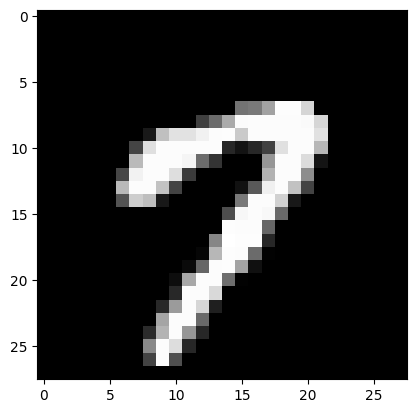

In [4]:
_=plt.imshow(x_train[15],cmap=plt.get_cmap('gray'))

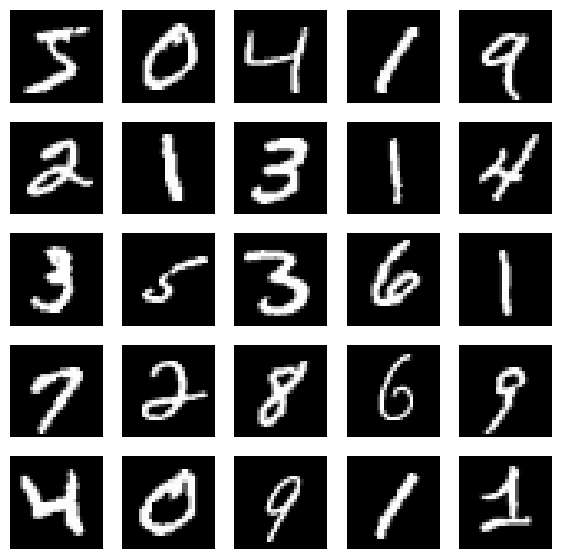

In [5]:
plt.figure(figsize=(7,7))
for i in np.arange(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 56s 127ms/step - loss: 0.3598 - accuracy: 0.8899 - val_loss: 0.0863 - val_accuracy: 0.9763
Epoch 2/15
422/422 [==============================] - 42s 100ms/step - loss: 0.1156 - accuracy: 0.9648 - val_loss: 0.0595 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0853 - accuracy: 0.9739 - val_loss: 0.0493 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0726 - accuracy: 0.9784 - val_loss: 0.0436 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0369 - val_accura

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026979738846421242
Test accuracy: 0.9901000261306763
